# Logistic Regression

$f(z)= \frac{1}{1+exp(-z)}$

    - Some physics function I don't know used to differentiate between class (binary)

insert graph that goes to 1 as x-> $ \infty $ and 0 as x -> $- \infty $ , at zero, y=1/2

$P(y=1|x)$

$y(0,1)$

$\hat{p}(y=1|x)= \frac{1}{1+exp(-\sum_{j}^{} \beta_j  x_j)} $

X=x, Y=1 => P(Y=1,X=x) $\simeq$ 1

X=x, Y=0 => P(Y=1,X=x) $\simeq$ 0

P(Y=1,X=x)+P(Y=1,X=x)=1

If y=1, maximize $\hat{p}(y=1|x,\beta)$

If y=0, minimize$\hat{p}(y=1|x,\beta)$

$p(y|x)=p(y=1|x=x)^{y} p(y=0|x=x)^{1-y}$

## Likelihood function (;

$L(\beta)=\prod\limits_{i}^{} \hat{p}(y^{(i)}|x^{(i)},\beta)$	

##### MLE(: Maximum likelihood estimate
Need to take partial derivative of the log likelihood function with respects to $\beta$

###### Log-likelihood function
$p(\beta)=log(L(\beta))$

$p(\beta)=\sum_{i=1}^{N}log(\hat{p}(y^{(i)}|x^{(i)},\beta) = 
\sum_{i=1}^{N}log(\frac{1}{1+exp(-\sum_{j}^{} \beta_j x_j)})$

##### Gradient Ascent
$\beta_j <- \beta_j + \alpha \frac{\partial P(\beta)}{\partial (\beta_j)}$

$\beta_j <- \beta_j +\alpha (y^{(i)}-\hat{p}^{(i)}x_j^{(i)}$

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv("./data_classification.csv", index_col=["id"])

In [3]:
# Going to reduce for our uses
data_df["target"].value_counts(normalize=True) ###96% of the rows are 0's, 4% are 1's , we will balance the data for practive


0    0.963552
1    0.036448
Name: target, dtype: float64

In [4]:
data_df_0 = data_df.loc[data_df["target"]==0].sample(data_df["target"].sum())
data_df_1 = data_df.loc[data_df["target"]==1]

data_sub_df = pd.concat([data_df_0, data_df_1]).sample(frac=1.)
data_sub_df["target"].value_counts(normalize=True)

1    0.5
0    0.5
Name: target, dtype: float64

In [5]:
data_sub_df.shape

(43388, 58)

In [6]:
data_sub_df.isnull().any()

target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04      

In [7]:
from sklearn.model_selection import train_test_split

y= data_sub_df["target"]
x = data_sub_df.drop("target",1)
y_train,y_test, x_train, x_test=train_test_split(y, x, test_size=0.4, random_state=42, stratify=y )

In [8]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.5
0    0.5
Name: target, dtype: float64
1    0.5
0    0.5
Name: target, dtype: float64


In [9]:
from sklearn.linear_model import LogisticRegression

clf =LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
predictions = pd.DataFrame({"y":y_test, "prediction":clf.predict(x_test)})
predictions

,prediction,y
id,,
104831,0,0
1099354,0,0
264285,1,1
1479736,1,1
1265002,0,0
1173060,1,0
635670,0,0
1281702,0,0
1237650,1,1


In [11]:
(predictions["y"] == predictions["prediction"]).mean()

0.58924867480986398

In [12]:
from sklearn import metrics
metrics.accuracy_score(predictions["y"],predictions["prediction"])

0.58924867480986398

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

lr_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier(min_samples_leaf=50)
knn_clf = KNeighborsClassifier(n_neighbors=9,weights="distance",n_jobs=-1) #-1 to run all the cores
gbm_clf = GradientBoostingClassifier()

lr_clf.fit(x_train,y_train)
tree_clf.fit(x_train,y_train)
knn_clf.fit(x_train,y_train)
gbm_clf.fit(x_train,y_train)


pred_df = pd.DataFrame({"y":y_test,
                       "pred_lr":lr_clf.predict(x_test),
                        "pred_tree":tree_clf.predict(x_test),
                       "pred_knn":knn_clf.predict(x_test),
                       "pred_gbm":gbm_clf.predict(x_test)})

In [16]:
pred_df.apply(lambda x:metrics.accuracy_score(x,pred_df["y"]))

pred_gbm     0.593397
pred_knn     0.527483
pred_lr      0.589249
pred_tree    0.553584
y            1.000000
dtype: float64

In [17]:
pred_df.apply(lambda x:metrics.accuracy_score(x,pred_df["y"])).sort_values(ascending=False)

y            1.000000
pred_gbm     0.593397
pred_lr      0.589249
pred_tree    0.553584
pred_knn     0.527483
dtype: float64

# Receiver operating characteristic curve (ROC)

In [18]:
lr_clf.predict_proba(x_test)[:,1]

array([ 0.47685642,  0.45145907,  0.55285566, ...,  0.40219794,
        0.45507023,  0.4579335 ])

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,lr_clf.predict_proba(x_test)[:,1])

pd.DataFrame({"fpr":fpr,"tpr":tpr,"thresholds":thresholds})

,fpr,thresholds,tpr
0,0.000000,0.959291,0.000115
1,0.000000,0.888003,0.001268
2,0.000230,0.884667,0.001268
3,0.000230,0.880636,0.001729
4,0.000346,0.879201,0.001729
5,0.000346,0.878052,0.001959
6,0.000461,0.875702,0.001959
7,0.000461,0.863530,0.003342
8,0.000576,0.862522,0.003342
9,0.000576,0.859709,0.004033


# False Positive Rate (FPR)
+1 is positive -1 is negative outcome

TP = True Positive
FP = False Positive
TN = True Negative
FN = False Negative

$\frac{N_{FP}}{    N_{FP}      +N_{TN}}$



# True Positive Rate


$\frac{N_{TP}}{   N_{TP}      +N_{FN}}$


TPR vs FPR graph, the Area Under the Curve (AUC) which allows comparision of different classifiers 

may get a bit of a hysterisis



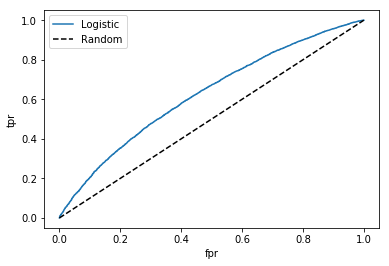

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label="Logistic")
plt.plot(fpr,fpr,"k--",label="Random")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()


In [23]:
metrics.roc_auc_score(y_test,lr_clf.predict_proba(x_test)[:,1])

0.62521646529456409

In [25]:
pred_df = pd.DataFrame({"y":y_test,
                       "pred_lr":lr_clf.predict_proba(x_test)[:,1],
                        "pred_tree":tree_clf.predict_proba(x_test)[:,1],
                       "pred_knn":knn_clf.predict_proba(x_test)[:,1],
                       "pred_gbm":gbm_clf.predict_proba(x_test)[:,1]})

pred_df.apply(lambda x:metrics.roc_auc_score(pred_df["y"],x)).sort_values(ascending=False)

y            1.000000
pred_gbm     0.632898
pred_lr      0.625216
pred_tree    0.574421
pred_knn     0.538423
dtype: float64

# Optimize model




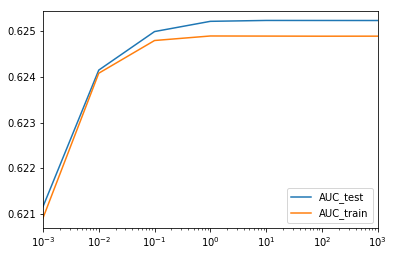

In [27]:
lr_clf = LogisticRegression(penalty="l2")

Cs = [0.001,0.01,0.1,1,10,100,1000]

auc_df = pd.DataFrame(index=Cs,columns=["AUC_test","AUC_train"])

for c in Cs:
    lr_clf.set_params(C=c)
    lr_clf.fit(x_train,y_train)
    y_estimated_train = lr_clf.predict_proba(x_train)[:,1]
    y_estimated_test = lr_clf.predict_proba(x_test)[:,1]
    auc_train = metrics.roc_auc_score(y_train,y_estimated_train)
    auc_test = metrics.roc_auc_score(y_test,y_estimated_test)
    auc_df.loc[c,:] = [auc_test,auc_train]
auc_df.plot(logx=True)
    